In [1]:
%matplotlib inline

from glob import glob
import json
from typing import List

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

In [2]:
import warnings
warnings.filterwarnings("ignore")

figsize(15, 9)
figsize(15, 9)

sns.__version__

'0.11.2'

In [3]:
def inner_product(row):
    return sum([g * p for g, p in row.items()])

In [4]:
result_files = glob("./results/*.json")

rows = []
for rf in result_files:
    with open(rf, "r") as istream:
        stats = json.load(istream)

    for name, history in stats.items():
        for g in history:
            rows.append({"guesses": g, "strategy": name})

df = pd.DataFrame(rows)

counts = df.assign(count=1).groupby(["strategy", "guesses"])[["count"]].sum().reset_index()
pivot_df = counts.pivot("strategy", "guesses", "count").fillna(0.0)
norm_pivot_df = pivot_df / pivot_df.sum(axis=1).max()
melted_df = norm_pivot_df.reset_index().melt(id_vars=['strategy'], value_name = 'probability')
norm_pivot_df['avg'] = norm_pivot_df.apply(inner_product, axis=1)
norm_pivot_df.sort_values(by='avg')

guesses,1,2,3,4,5,6,7,avg
strategy,,,,,,,,
StrategyMinMaxFeedbackMatches,0.000000,0.017603,0.187041,0.387365,0.252700,0.097732,0.057559,4.398596
StrategyFirstGuessRoate,0.000000,0.015119,0.144060,0.312419,0.276998,0.148704,0.102700,4.708207
StrategyFirstGuessRaise,0.000000,0.016739,0.139849,0.308315,0.281210,0.147840,0.106048,4.721706
StrategyFirstGuessArise,0.000432,0.017171,0.138337,0.310367,0.275810,0.151944,0.105940,4.723542
StrategyMatchedFeedback,0.000108,0.011231,0.105400,0.293521,0.314579,0.167387,0.107775,4.844492
StrategyFirstGuessAdieu,0.000000,0.011015,0.109827,0.287257,0.304968,0.172570,0.114363,4.861339
StrategyFirstGuessAudio,0.000000,0.010583,0.108963,0.278078,0.308315,0.175486,0.118575,4.884881
StrategyMaxCharacterFrequency,0.000000,0.005184,0.046544,0.192333,0.293413,0.251728,0.210799,5.372354
StrategyFilterOnFeedback,0.000108,0.003996,0.022030,0.053240,0.086285,0.109287,0.725054,6.449676


In [5]:
melted_df

,strategy,guesses,probability
0,StrategyFilterOnFeedback,1,0.000108
1,StrategyFirstGuessAdieu,1,0.000000
2,StrategyFirstGuessArise,1,0.000432
3,StrategyFirstGuessAudio,1,0.000000
4,StrategyFirstGuessRaise,1,0.000000
...,...,...,...
72,StrategyMatchedFeedback,7,0.107775
73,StrategyMaxCharacterFrequency,7,0.210799
74,StrategyMinMaxFeedbackMatches,7,0.057559
75,StrategyRandomWithReplacement,7,0.999676


strategy
StrategyFirstGuessAdieu          AxesSubplot(0.125,0.125;0.775x0.755)
StrategyFirstGuessArise          AxesSubplot(0.125,0.125;0.775x0.755)
StrategyFirstGuessAudio          AxesSubplot(0.125,0.125;0.775x0.755)
StrategyFirstGuessRaise          AxesSubplot(0.125,0.125;0.775x0.755)
StrategyFirstGuessRoate          AxesSubplot(0.125,0.125;0.775x0.755)
StrategyMatchedFeedback          AxesSubplot(0.125,0.125;0.775x0.755)
StrategyMaxCharacterFrequency    AxesSubplot(0.125,0.125;0.775x0.755)
StrategyMinMaxFeedbackMatches    AxesSubplot(0.125,0.125;0.775x0.755)
Name: probability, dtype: object

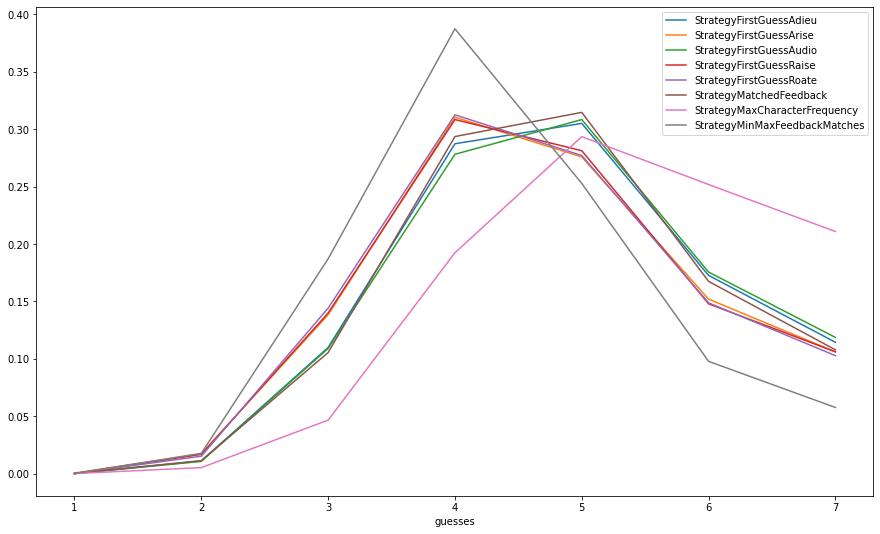

In [6]:
melted_df[
    ~melted_df['strategy'].isin([
        'StrategyRandomWithReplacement',
        'StrategyRandomWithoutReplacement',
        'StrategyFilterOnFeedback',
    ])
]\
    .set_index("guesses")\
    .groupby('strategy')["probability"]\
    .plot(legend=True)

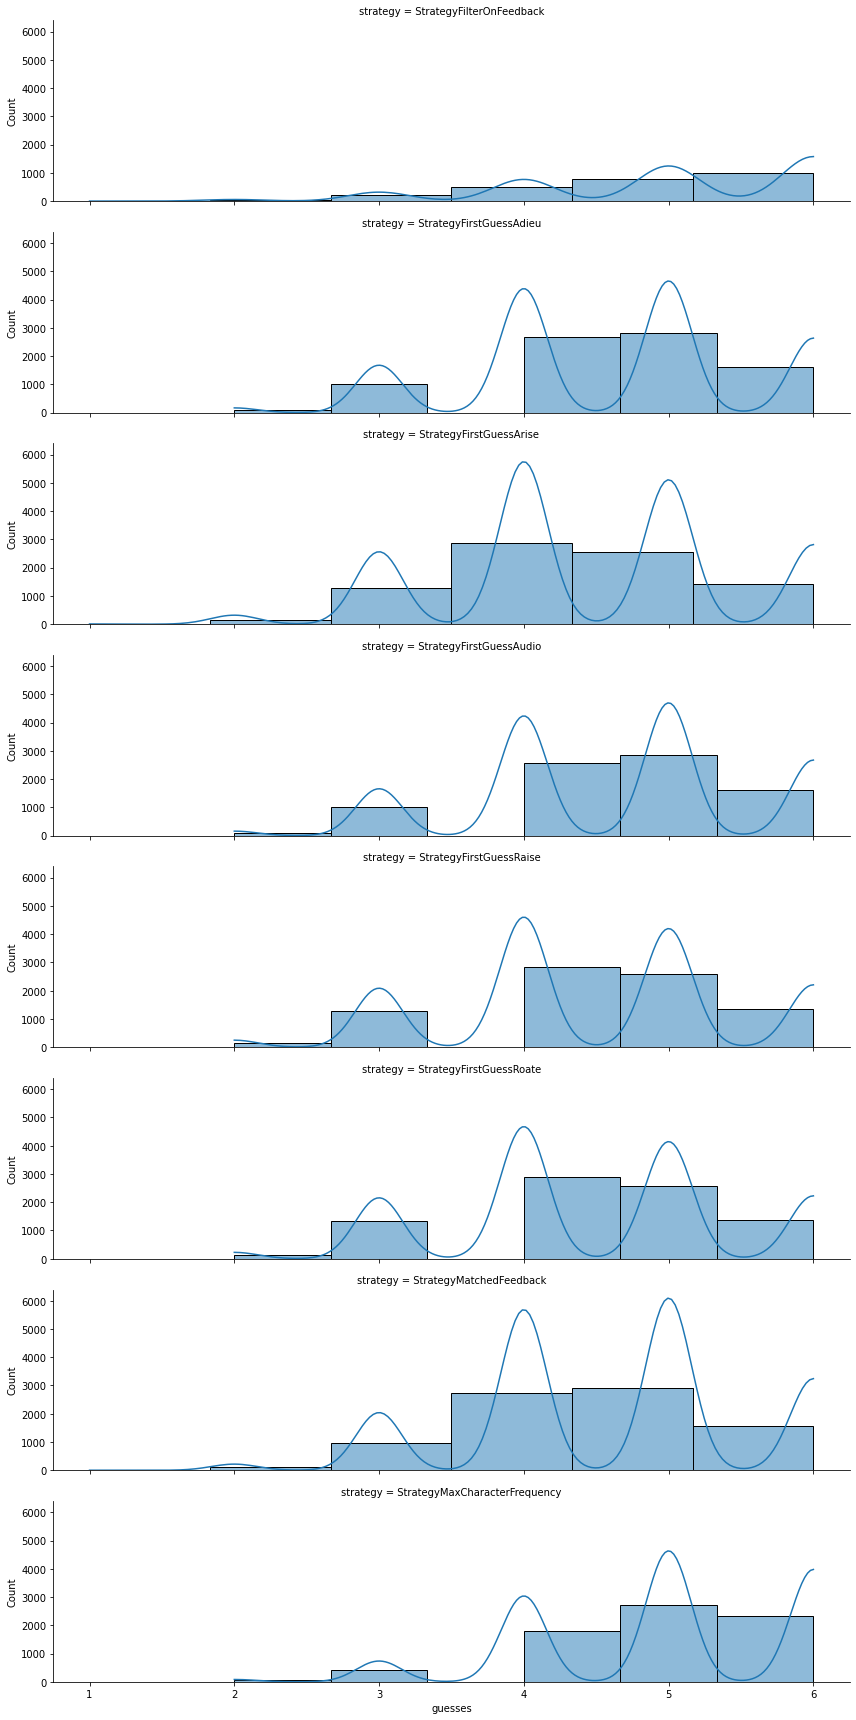

In [7]:
ignored_strategies = [
    'StrategyRandomWithReplacement',
    'StrategyRandomWithoutReplacement',
    'StrategyMinMaxFeedbackMatches',
]

strategies = sorted([s for s in df['strategy'].unique() if s not in ignored_strategies])

g = sns.FacetGrid(
    df[(df['strategy'].isin(strategies)) & (df['guesses'] < 7)].sort_values(by='strategy'),
    row="strategy",
    aspect=4,
)
g.map(sns.histplot, 'guesses', bins=6, stat='count', kde=True)
plt.show()